In [3]:
# packages 

# standard
import numpy as np
import pandas as pd
import time

# plots
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Machine Learning
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [4]:
# import data
df = pd.read_excel('Data/Raisin.xlsx', sheet_name='Raisin_Grains_Dataset')
df.head()

Area   Perimeter  MajorAxisLength  MinorAxisLength  Eccentricity  \
0  87524  442.246011       253.291155         0.819738         90546   
1  75166  406.690687       243.032436         0.801805         78789   
2  90856  442.267048       266.328318         0.798354         93717   
3  45928  286.540559       208.760042         0.684989         47336   
4  79408  352.190770       290.827533         0.564011         81463   

   ConvexArea    Extent    Class  
0    0.758651  1184.040  Kecimen  
1    0.684130  1121.786  Kecimen  
2    0.637613  1208.575  Kecimen  
3    0.699599   844.162  Kecimen  
4    0.792772  1073.251  Kecimen

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   Perimeter        900 non-null    float64
 2   MajorAxisLength  900 non-null    float64
 3   MinorAxisLength  900 non-null    float64
 4   Eccentricity     900 non-null    int64  
 5   ConvexArea       900 non-null    float64
 6   Extent           900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [6]:
# target
df.Class.value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

In [7]:
# basic stats for numerical features
features_num = ['Area', 'MajorAxisLength', 'MinorAxisLength', 
                'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']

df[features_num].describe()

Area  MajorAxisLength  MinorAxisLength   Eccentricity  \
count     900.000000       900.000000       900.000000     900.000000   
mean    87804.127778       254.488133         0.781542   91186.090000   
std     39002.111390        49.988902         0.090318   40769.290132   
min     25387.000000       143.710872         0.348730   26139.000000   
25%     59348.000000       219.111126         0.741766   61513.250000   
50%     78902.000000       247.848409         0.798846   81651.000000   
75%    105028.250000       279.888575         0.842571  108375.750000   
max    235047.000000       492.275279         0.962124  278217.000000   

       ConvexArea       Extent   Perimeter  
count  900.000000   900.000000  900.000000  
mean     0.699508  1165.906636  430.929950  
std      0.053468   273.764315  116.035121  
min      0.379856   619.074000  225.629541  
25%      0.670869   966.410750  345.442898  
50%      0.707367  1119.509000  407.803951  
75%      0.734991  1308.389750  494.187014  
max      0.835455  2697.753000  997.291941

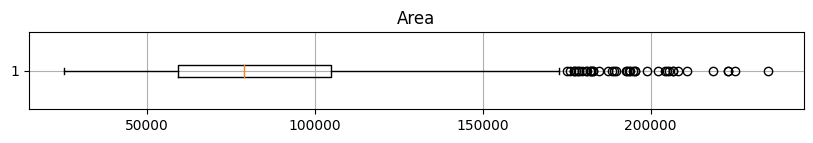

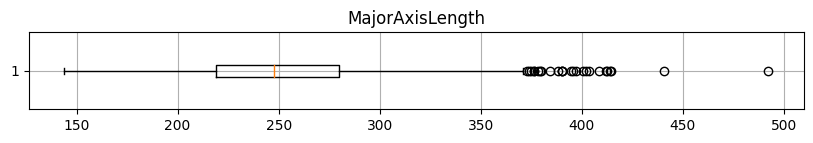

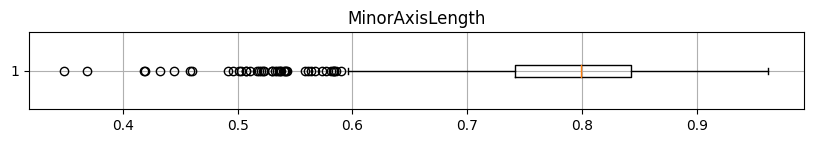

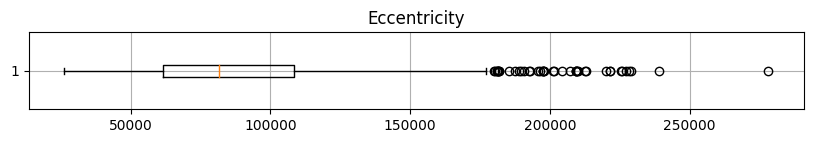

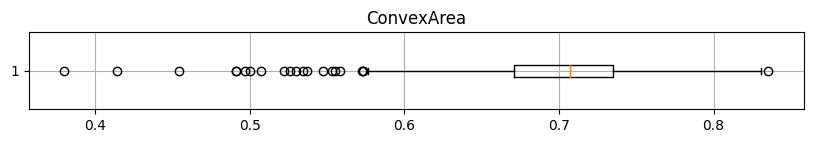

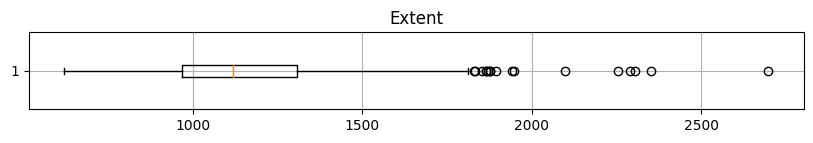

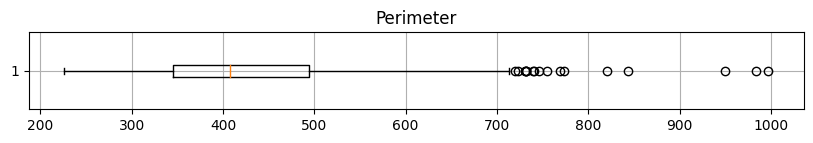

In [8]:
# boxplots of all features
for f in features_num:
    plt.figure(figsize=(10,1))
    plt.boxplot(x=df[f], vert=False)
    plt.title(f)
    plt.grid()
    plt.show()

# Feature Correlations



## pairwise scatterplot, representing Class by color

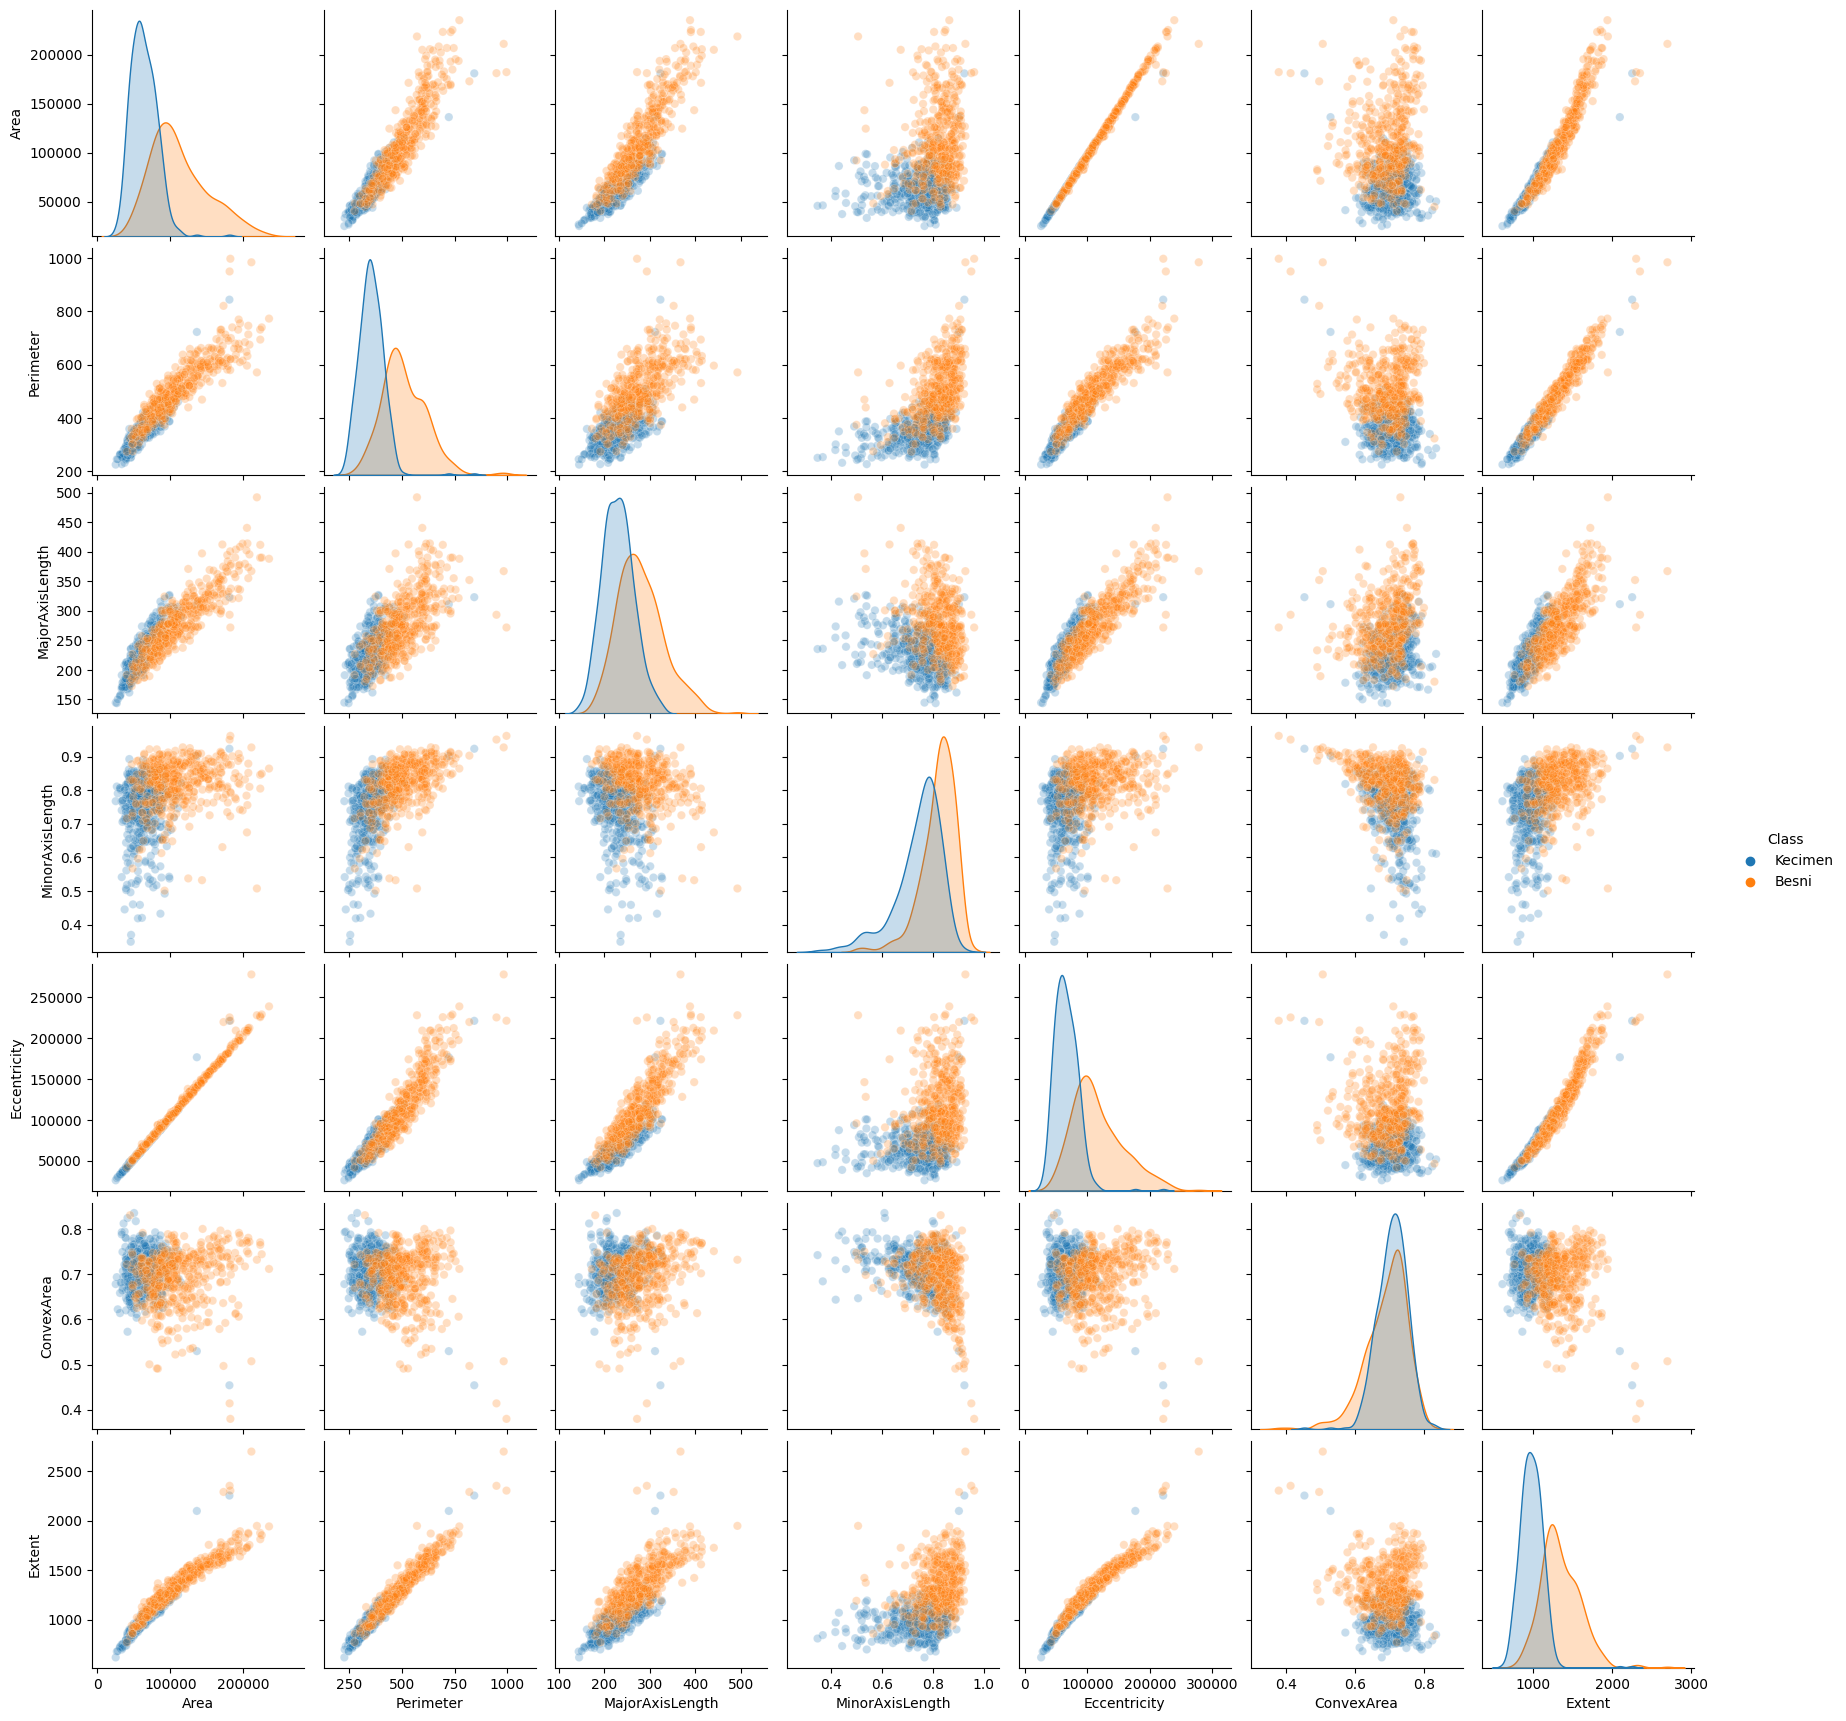

In [9]:
sns.pairplot(df, hue='Class',
             plot_kws = {'alpha' : 0.25})
plt.show()

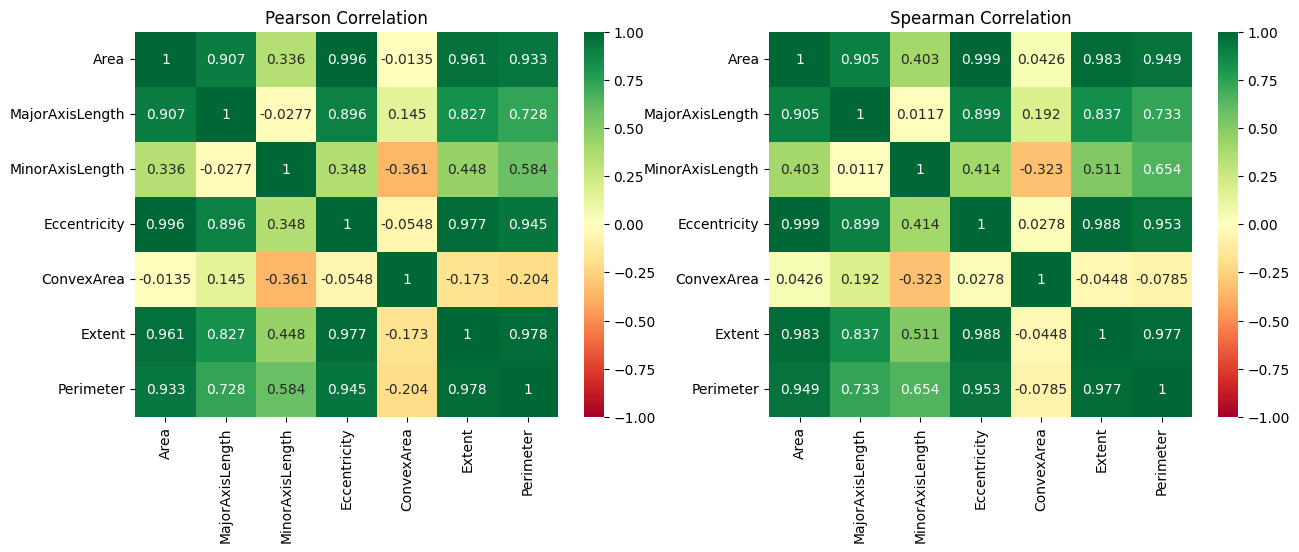

In [10]:
# calc and display correlations
corr_pearson = df[features_num].corr(method='pearson')
corr_spearman = df[features_num].corr(method='spearman')

plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,2,1)
sns.heatmap(corr_pearson, annot=True, cmap='RdYlGn', 
            fmt='.3g', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')

ax2 = plt.subplot(1,2,2, sharex=ax1)
sns.heatmap(corr_spearman, annot=True, cmap='RdYlGn',
            fmt='.3g', vmin=-1, vmax=+1)
plt.title('Spearman Correlation')
plt.show()

## Feature Distributions by Class



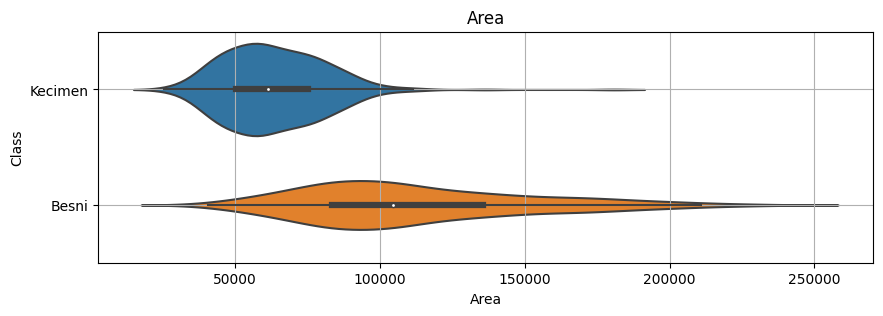

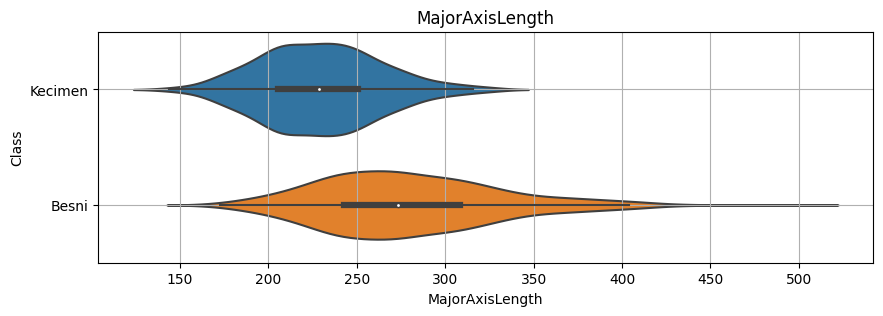

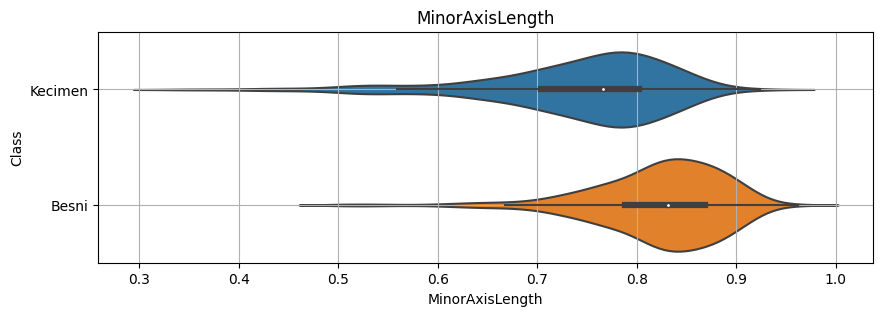

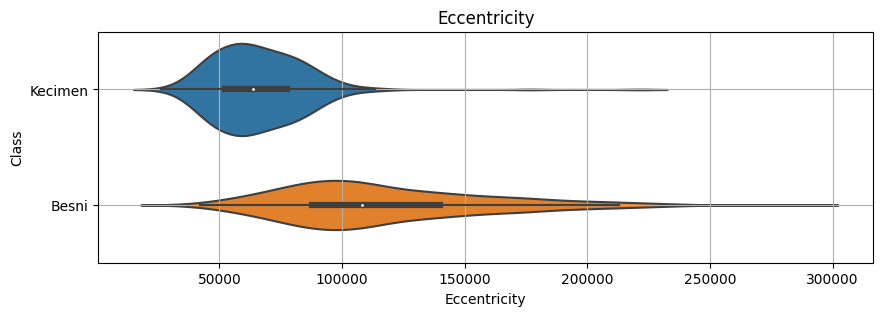

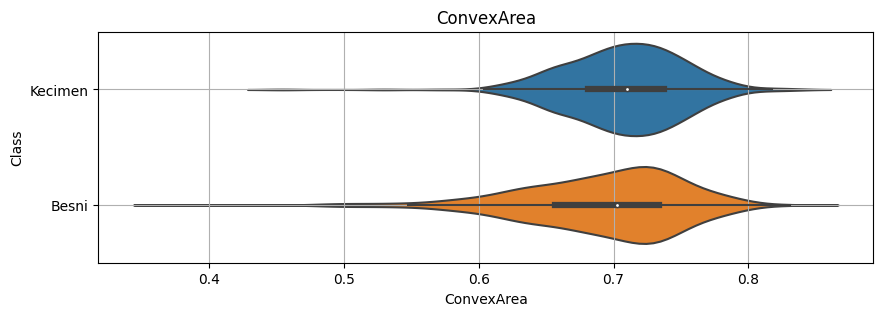

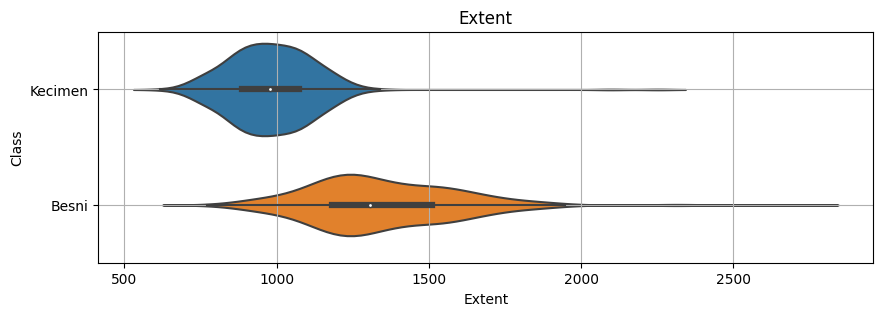

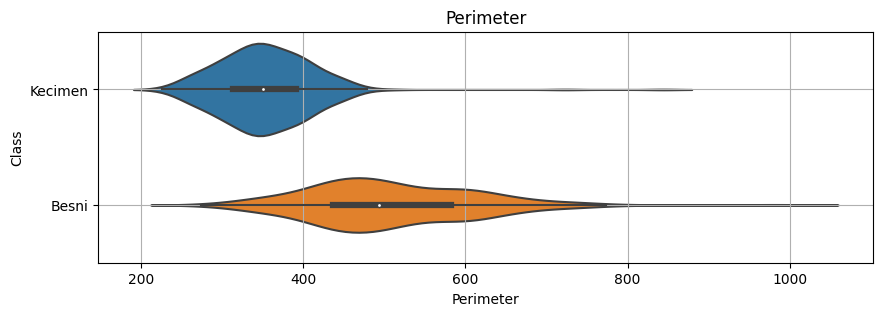

In [11]:
# plot distributions split by class for each feature
for f in features_num:
    plt.figure(figsize=(10,3))
    sns.violinplot(data=df, y='Class', x=f)
    plt.grid()
    plt.title(f)
    plt.show()

## Dimensionality Reduction - PCA

In [12]:
# standardize features
df4pca_std = StandardScaler().fit_transform(df[features_num])
# run PCA
pc_model = PCA(n_components=3)
pc = pc_model.fit_transform(df4pca_std)
# append PCA components to original data frame
df['pc_1'] = pc[:,0]
df['pc_2'] = pc[:,1]
df['pc_3'] = pc[:,2]
# interactive 3D plot - colored by class; size ~ area
fig = px.scatter_3d(df, x='pc_1', y='pc_2', z='pc_3',
                    color=df.Class.astype(str),
                    size=df.Area,
                    hover_data=features_num,
                    opacity=0.35)
fig.update_layout(title='Visualization using PCA dimension reduction')
fig.show()